In [17]:
import polars as pl
import seaborn as sn
import numpy as np

In [18]:
vdem = pl.read_parquet("../vdemData/V-Dem-CY-Full+Others-v15.parquet")
vdem.columns

['country_name',
 'country_text_id',
 'country_id',
 'year',
 'historical_date',
 'project',
 'historical',
 'histname',
 'codingstart',
 'codingend',
 'codingstart_contemp',
 'codingend_contemp',
 'codingstart_hist',
 'codingend_hist',
 'gapstart1',
 'gapstart2',
 'gapstart3',
 'gapend1',
 'gapend2',
 'gapend3',
 'gap_index',
 'COWcode',
 'v2x_polyarchy',
 'v2x_polyarchy_codelow',
 'v2x_polyarchy_codehigh',
 'v2x_polyarchy_sd',
 'v2x_libdem',
 'v2x_libdem_codelow',
 'v2x_libdem_codehigh',
 'v2x_libdem_sd',
 'v2x_partipdem',
 'v2x_partipdem_codelow',
 'v2x_partipdem_codehigh',
 'v2x_partipdem_sd',
 'v2x_delibdem',
 'v2x_delibdem_codelow',
 'v2x_delibdem_codehigh',
 'v2x_delibdem_sd',
 'v2x_egaldem',
 'v2x_egaldem_codelow',
 'v2x_egaldem_codehigh',
 'v2x_egaldem_sd',
 'v2x_api',
 'v2x_api_codelow',
 'v2x_api_codehigh',
 'v2x_api_sd',
 'v2x_mpi',
 'v2x_mpi_codelow',
 'v2x_mpi_codehigh',
 'v2x_mpi_sd',
 'v2x_freexp_altinf',
 'v2x_freexp_altinf_codelow',
 'v2x_freexp_altinf_codehigh',
 'v2

In [19]:
vdem.shape

(27913, 4607)

In [20]:
vdem_small = vdem[
    [
        "country_name",
        "year",
        "v2x_polyarchy",
        "v2x_libdem",
        "v2x_freexp_altinf",
        "v2x_corr",
        "v2cltort",
    ]
]

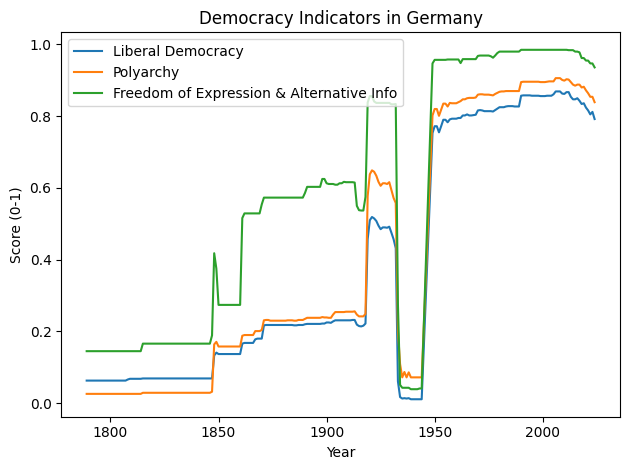

In [21]:
# Define country
country = "Germany"

# Filter subset
subset = (
    vdem.filter(pl.col("country_name") == country)
    .select(["year", "v2x_libdem", "v2x_polyarchy", "v2x_freexp_altinf"])
    .sort("year")
)

# Extract columns for plotting
years = subset["year"].to_numpy()
libdem = subset["v2x_libdem"].to_numpy()
polyarchy = subset["v2x_polyarchy"].to_numpy()
freedom = subset["v2x_freexp_altinf"].to_numpy()

# Plot
plt.plot(years, libdem, label="Liberal Democracy")
plt.plot(years, polyarchy, label="Polyarchy")
plt.plot(years, freedom, label="Freedom of Expression & Alternative Info")
plt.title(f"Democracy Indicators in {country}")
plt.xlabel("Year")
plt.ylabel("Score (0-1)")
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
cols = [
    "v2x_polyarchy",
    "v2x_libdem",
    "v2x_freexp_altinf",
    "v2x_corr",
    "v2x_gender",
    "v2exthftps",
]
vdem_corr = vdem.select(cols).drop_nulls()

# Compute correlation matrix
corr_matrix = vdem_corr.corr()

# Display result
print(corr_matrix)

shape: (6, 6)
┌───────────────┬────────────┬───────────────────┬───────────┬────────────┬────────────┐
│ v2x_polyarchy ┆ v2x_libdem ┆ v2x_freexp_altinf ┆ v2x_corr  ┆ v2x_gender ┆ v2exthftps │
│ ---           ┆ ---        ┆ ---               ┆ ---       ┆ ---        ┆ ---        │
│ f64           ┆ f64        ┆ f64               ┆ f64       ┆ f64        ┆ f64        │
╞═══════════════╪════════════╪═══════════════════╪═══════════╪════════════╪════════════╡
│ 1.0           ┆ 0.97398    ┆ 0.898042          ┆ -0.384067 ┆ 0.853442   ┆ 0.447212   │
│ 0.97398       ┆ 1.0        ┆ 0.876653          ┆ -0.501053 ┆ 0.811591   ┆ 0.555684   │
│ 0.898042      ┆ 0.876653   ┆ 1.0               ┆ -0.359834 ┆ 0.779261   ┆ 0.418969   │
│ -0.384067     ┆ -0.501053  ┆ -0.359834         ┆ 1.0       ┆ -0.281271  ┆ -0.893698  │
│ 0.853442      ┆ 0.811591   ┆ 0.779261          ┆ -0.281271 ┆ 1.0        ┆ 0.309242   │
│ 0.447212      ┆ 0.555684   ┆ 0.418969          ┆ -0.893698 ┆ 0.309242   ┆ 1.0        │
└──────

In [17]:
vdem_numeric = vdem.select_dtypes(include="number")

In [18]:
vdem_numeric.shape

(27913, 4578)

In [ ]:
vdem_numeric_corr = vdem_numeric.corr()
vdem_numeric_corr.to_csv("../data/vdem_numeric_corr.csv", index=False)
vdem_numeric_corr

<bound method DataFrame.corr of        country_id  year  project  ...  e_miinterc  e_pt_coup  e_pt_coup_attempts
0               3  1789        1  ...         0.0        NaN                 NaN
1               3  1790        1  ...         0.0        NaN                 NaN
2               3  1791        1  ...         0.0        NaN                 NaN
3               3  1792        1  ...         0.0        NaN                 NaN
4               3  1793        1  ...         0.0        NaN                 NaN
...           ...   ...      ...  ...         ...        ...                 ...
27908         373  1857        1  ...         NaN        NaN                 NaN
27909         373  1858        1  ...         NaN        NaN                 NaN
27910         373  1859        1  ...         NaN        NaN                 NaN
27911         373  1860        1  ...         NaN        NaN                 NaN
27912         373  1861        1  ...         NaN        NaN                 

/var/folders/mz/h0xxdjw17gs4nw0d1t3zh6t00000gn/T/ipykernel_41597/1650794481.py:13: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  germany_long = germany.melt(


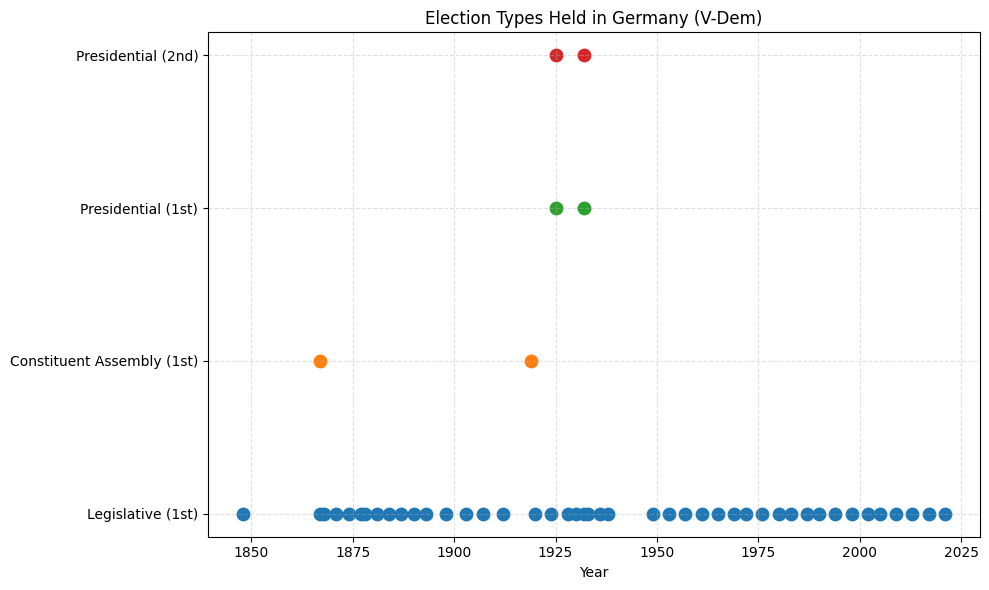

In [45]:
# Keep only Germany and election columns
election_cols = [f"v2eltype_{i}" for i in range(10)]
cols = ["country_name", "year"] + election_cols

germany = vdem.filter(pl.col("country_name") == "Germany").select(cols).drop_nulls()

# Melt to long format
germany_long = germany.melt(
    id_vars=["year"],
    value_vars=election_cols,
    variable_name="election_type",
    value_name="held",
).filter(pl.col("held") == 1)

# Convert to pandas for easier plotting
df = germany_long.to_pandas()

# Optional: clean label names
label_map = {
    "v2eltype_0": "Legislative (1st)",
    "v2eltype_1": "Legislative (2nd)",
    "v2eltype_2": "Upper Chamber (1st)",
    "v2eltype_3": "Upper Chamber (2nd)",
    "v2eltype_4": "Constituent Assembly (1st)",
    "v2eltype_5": "Constituent Assembly (2nd)",
    "v2eltype_6": "Presidential (1st)",
    "v2eltype_7": "Presidential (2nd)",
    "v2eltype_8": "Supranational (1st)",
    "v2eltype_9": "Supranational (2nd)",
}
df["election_type"] = df["election_type"].map(label_map)

# Plot
plt.figure(figsize=(10, 6))
for etype in df["election_type"].unique():
    subset = df[df["election_type"] == etype]
    plt.scatter(subset["year"], [etype] * len(subset), label=etype, s=80)

plt.title("Election Types Held in Germany (V-Dem)")
plt.xlabel("Year")
plt.yticks(rotation=0)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [34]:
countr_names = vdem.unique(subset=["country_name"], maintain_order=False)

In [37]:
print(country_names.rows)

<bound method DataFrame.rows of shape: (202, 4_607)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ country_na ┆ country_te ┆ country_id ┆ year ┆ … ┆ e_civil_wa ┆ e_miinter ┆ e_pt_coup ┆ e_pt_coup │
│ me         ┆ xt_id      ┆ ---        ┆ ---  ┆   ┆ r          ┆ c         ┆ ---       ┆ _attempts │
│ ---        ┆ ---        ┆ i64        ┆ i64  ┆   ┆ ---        ┆ ---       ┆ f64       ┆ ---       │
│ str        ┆ str        ┆            ┆      ┆   ┆ f64        ┆ f64       ┆           ┆ f64       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Iceland    ┆ ISL        ┆ 168        ┆ 1900 ┆ … ┆ null       ┆ 0.0       ┆ null      ┆ null      │
│ Barbados   ┆ BRB        ┆ 147        ┆ 1900 ┆ … ┆ null       ┆ 0.0       ┆ null      ┆ null      │
│ Zanzibar   ┆ ZZB        ┆ 236        ┆ 1856 ┆ … ┆ null       ┆ null      ┆ null      ┆ null      │
│ Guyana     ┆ GUY        ┆ 166        